## ANN on titanic data
 in this notebook I applied a simple keras NN to predict the survival on titanic data. The model was built in Keras and had 3 layers, on which later I added a dropout layes and early stopping to compare on their performances. 

 At the end of the notebook you can find the final remarks

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#Here start the implementation of a simple ANN classifier

In [124]:
# reading the data
training = pd.read_csv('gdrive/MyDrive/TITANIC/titanic/train.csv')

In [125]:
# Dropping columns for now, that are a bit less easily understandable. Maybe later we can incorporate them in the the model
training_no_cat  = training.copy()
training_no_cat = training_no_cat.drop(['PassengerId','Name', 'Ticket' , 'Cabin', 'Sex', 'Embarked'], axis=1)
training_no_cat.dropna(inplace=True)# drop na, maybe later we can fill them with the modes and medians of the cols 

In [126]:
training_no_cat.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


Prepare the training data set
1. **Survived** is the column with the label (0 or 1).
1. The rest of the columns are the features.
1. We use the scikit-learn function train_test_split(X, y, test_size=0.2, random_state=42) to split the data into training and validation data sets, given 20% of the records to the validation data set.  The **training** data set is used to train the mode, meaning find the weights and biases.  The **validation data** set is used to check its parameter tuning.
1. **labels** is not an array. It is a column in a dataset.  So we use the NumPy np.ravel() function to convert that to an array.

In [127]:
import numpy as np

Survived = training_no_cat.iloc[:, 0]
features = training_no_cat.iloc[:, 1:6]

X_train_no_cat = features
y_train_no_cat = np.ravel(Survived)

In [128]:
X_train_no_cat.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [129]:
# Here I am simply scaling the numerical variables, and reducing to dummies the categorical ones
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_no_cat[['Pclass','Age','Parch','Fare', 'SibSp']] = scaler.fit_transform(X_train_no_cat[['Pclass','Age','Parch','Fare', 'SibSp']])

In [130]:
# building a simple model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(5, activation='relu', input_shape=(5,)))

model.add(Dense(5, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
# choosing the loss optimizer etc
model.compile(loss = 'binary_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])
                   
model_history = model.fit(X_train_no_cat, y_train_no_cat, validation_split = 0.20, epochs = 50, batch_size = 10, verbose = 1)

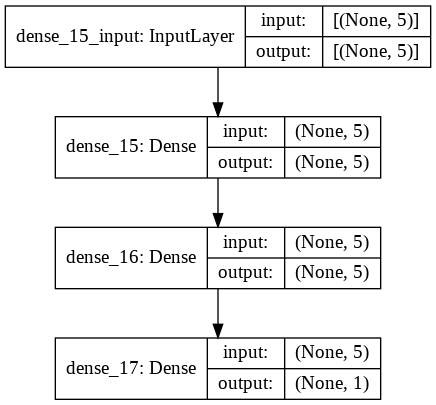

In [81]:
from keras.utils import plot_model
plot_model(model, to_file = '/tmp/model.png', show_shapes = True,)

In [82]:
score = model.evaluate(X_train_no_cat, y_train_no_cat, verbose=1)
print('the loss value is ', score[0], 'while the accuracy is ', score[1])

23/23 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.7087
the loss value is  0.5744864344596863 while the accuracy is  0.7086834907531738


 here we see that the model is clearly overfitting the data! 
 the validation accuracy decreases

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


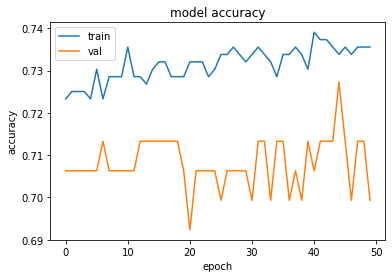

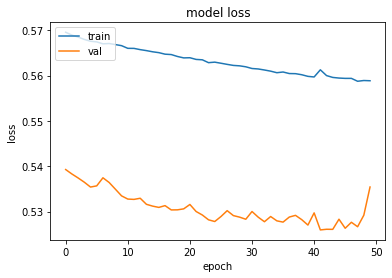

In [141]:
# list all data in history
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Reduce overfitting:
1. dropout layers
2. early stopping
3. data augmentation ?

In [154]:
# we have to improve the the accuracy by avoiding the overfitting
# adding the dropout layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()

model.add(Dense(5, activation='relu', input_shape=(5,)))
model.add(Dropout(0.2))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# choosing the loss optimizer etc
model.compile(loss = 'binary_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])
                   
model_history = model.fit(X_train_no_cat, y_train_no_cat, validation_split = 0.20, epochs = 60, batch_size = 10, verbose = 1)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


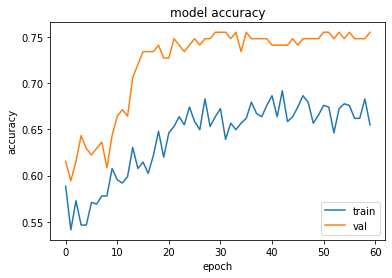

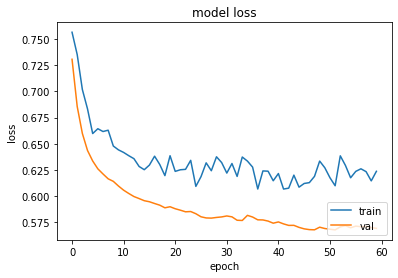

In [156]:
# list all data in history
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy + Dropout')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss + Dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [113]:
# here we implement the early stopping
from keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor='loss', patience=3, verbose=1)
	
model_history = model.fit(X_train_no_cat, y_train_no_cat, validation_split = 0.20, callbacks=[es_callback], batch_size = 10)
len(model_history.history['loss'])

58/58 [==============================] - 0s 3ms/step - loss: 0.6286 - accuracy: 0.6550 - val_loss: 0.5999 - val_accuracy: 0.7273


1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


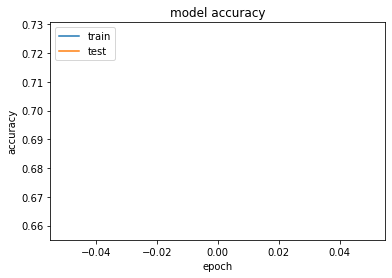

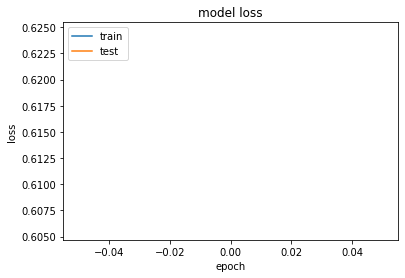

In [107]:
# list all data in history
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Final remarks on ANN on titanic data

the dataset is too small to run a NN and you can see that each time you run the very same NN you have differetn coutcomes.